In [ ]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def read_and_plot_multiple(files_and_labels):
    """
    Reads gas_NO and gas_OH from multiple files and plots them.

    Parameters:
        files_and_labels (list of tuples): Each tuple contains the file path and the label for the plot.
    """
    plt.figure(figsize=(8, 6))
    plt.rc('font', family='serif')

    for file_path, label in files_and_labels:
        logNO = []
        logOH = []

        # Open the file and read line by line
        with open(file_path, 'r') as file:
            lines = file.readlines()
            for i, line in enumerate(lines):
                # Check for the relevant sections
                if line.startswith("Stellar mass-weighted [N/O]:"):
                    logNO = list(map(float, lines[i + 1].strip().split()))
                elif line.startswith("Stellar mass-weighted [O/H]:"):
                    logOH = list(map(float, lines[i + 1].strip().split()))
    logOH = [value + 12 - 8.69/12 for value in logOH]
    plt.plot(logOH, logNO, label=label)
    plt.xlabel('12+log(O/H)')
    plt.ylabel('log(N/O)')
    plt.savefig('figs/NO_OH_plot.png')
    plt.legend()
    plt.show()


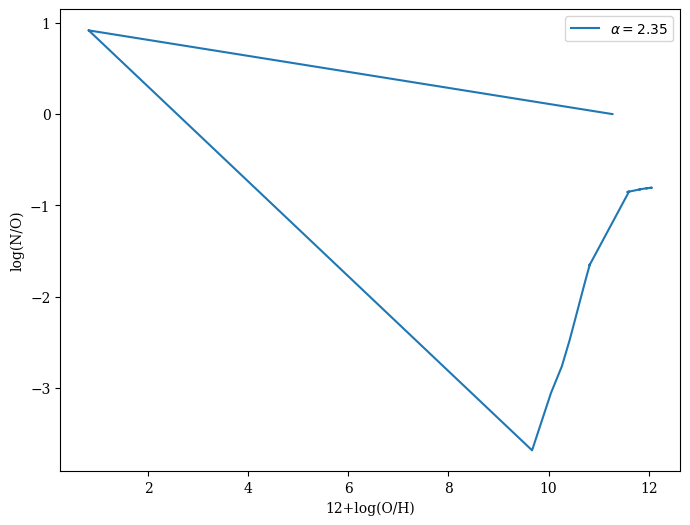

In [9]:
# Example usage
files_and_labels = [
    ("/home/adriana/python/galIMF/simulation_results_from_galaxy_evol/imfKroupaSTF0.5log_SFR0.1SFEN9.0Z_0-15.98/chemical_and_SN_evolution.txt", "$\\alpha=2.35$"),
    #("/home/adriana/python/galIMF/simulation_results_from_galaxy_evol/imfigimfSTF0.5log_SFR0.1SFEN9Z_0-15.98/chemical_and_SN_evolution.txt", "igimf"),
    #("simulation_results_from_galaxy_evol/imfigimfSTF0.5log_SFR0.3SFEN9.0Z_0-15.98/chemical_and_SN_evolution.txt", "Scenario 3"),
]

read_and_plot_multiple(files_and_labels)


In [ ]:
def load_data_with_names(file_path):
    """
    Load data from a file and associate each row with its corresponding name.

    Parameters:
        file_path (str): Path to the file.

    Returns:
        dict: A dictionary where keys are row names and values are the corresponding data arrays.
    """
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Initialize the dictionary to store data
    data_dict = {}

    # Iterate through the lines to extract names and data
    for i in range(len(lines)):
        line = lines[i].strip()
        if line.startswith("#"):  # Check if the line starts with '#'
            # Extract the name (remove the '#' and strip whitespace)
            row_name = line[1:].strip()
            # The next line contains the numerical data
            if i + 1 < len(lines):
                data = list(map(float, lines[i + 1].strip().split()))
                data_dict[row_name] = data

    return data_dict

In [38]:
file_path = "/home/adriana/python/galIMF/simulation_results_from_galaxy_evol/imfKroupaSTF0.5log_SFR0.1SFEN9Z_0-15.98/chemical_and_SN_evolution.txt"
data = load_data_with_names(file_path)

# Access specific rows by name
logNO = data['Stellar mass-weighted [N/O]:']
logOH = data['Stellar mass-weighted [O/H]:']
timestep = data['time step list:']
sfh = np.loadtxt("SFH.txt")

ValueError: x and y must have same first dimension, but have shapes (63,) and (1302,)

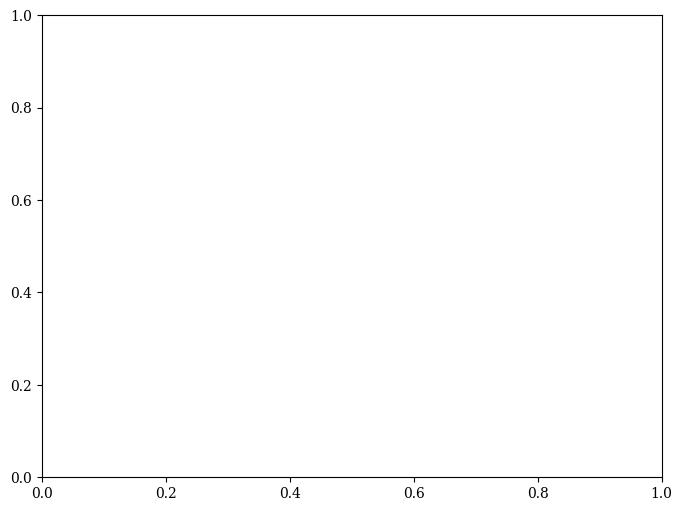

In [39]:
#plot sfh

plt.figure(figsize=(8, 6))
plt.plot(timestep, sfh)